Title: Multilayer Convolutional Neural Network
Author: Thomas Breuel
Institution: UniKL

In [2]:
from pylab import *
from scipy.ndimage import filters
def F(a): return array(a,'f')
figsize(12,6)

# Learning Deblurring

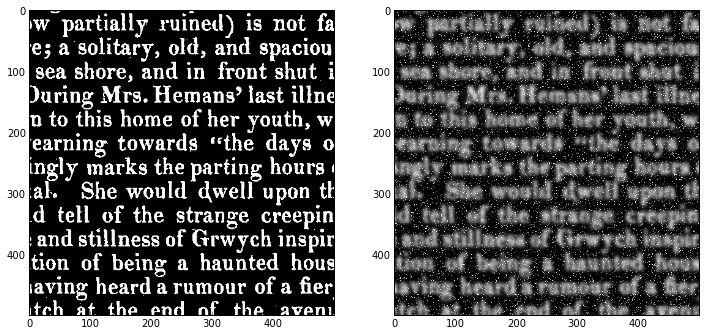

In [86]:
temp = F(mean(imread("page.png"),2))
roi = (slice(500,1000),slice(500,1000))
target = F(1-(temp[roi]>0.5))
gray()
subplot(121); imshow(target)
image = maximum(filters.gaussian_filter(target+0.2*randn(*target.shape),3.0),(rand(*image.shape)>0.95))
image -= amin(image); image /= amax(image)
subplot(122); imshow(image)
h,w = image.shape

In [87]:
def sigmoid(x): return 1/(1+exp(-x))

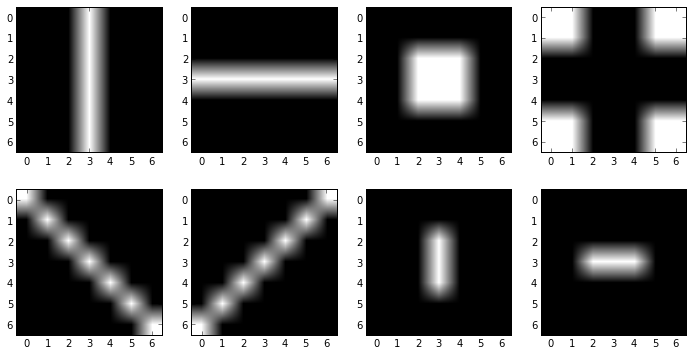

In [88]:
N = 8
l = arange(2*r+1)
r = 3
fs = array([0.01*ones((2*r+1,2*r+1)) for i in range(8)])
fs[0,:,r] = .1
fs[1,r,:] = .1
fs[2,r-1:r+2,r-1:r+2] = .1
fs[3,:2,:2] = .1; fs[3,:2,-2:] = .1; fs[3,-2:,:2] = .1; fs[3,-2:,-2:] = .1
fs[4,l,l] = .1
fs[5,l,l[::-1]] = .1
fs[6,r-1:r+2,r] = .1
fs[7,r,r-1:r+2] = .1
for i in range(N):
    fs -= mean(fs)
    fs[i] /= sum(fs**2)**.5
thetas = zeros(N)
ws = sin(1.7*arange(N))
theta2 = 0.0
figsize(12,6)
for i in range(N):
    subplot(2,4,i+1); imshow(fs[i])

(8, 500, 500)

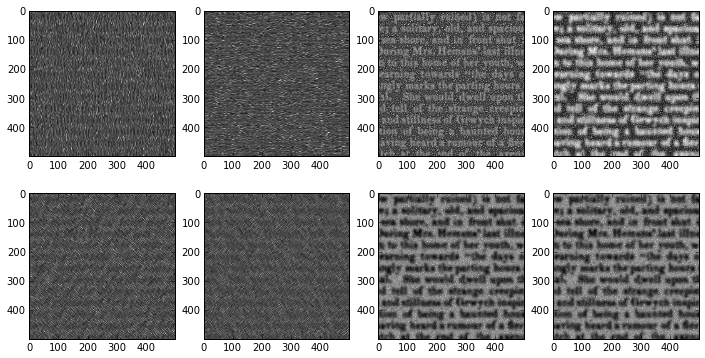

In [89]:
hs = array([sigmoid(filters.convolve(image,f)+thetas[i]) for i,f in enumerate(fs)])
for i in range(N):
    subplot(2,4,i+1); imshow(hs[i])
hs.shape

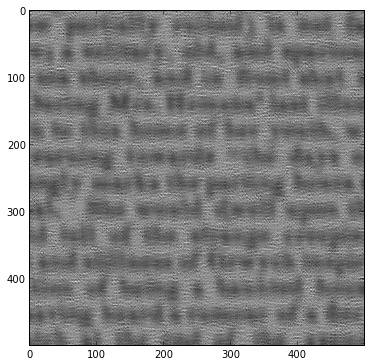

In [90]:
pred = sigmoid(dot(ws,hs.reshape(N,h*w)).reshape(h,w)+theta2)
imshow(pred)

In [91]:
def train(niter,eta=0.1):
    global N,r,fs,thetas,ws,theta2
    for iter in range(niter):
        hs = array([sigmoid(filters.convolve(image,f)+thetas[i]) for i,f in enumerate(fs)])
        pred = sigmoid(dot(ws,hs.reshape(N,h*w)).reshape(h,w)+theta2)
        err = sum((pred-target)**2)/(w*h)
        if iter%10==0: sys.stderr.write("\n")
        sys.stderr.write("%d:%.3f "%(iter,err))
        delta = (pred-target)*pred*(1-pred)
        delta /= h*w
        dw = array([sum(delta*hs[i]) for i,f in enumerate(fs)])
        for k,f in enumerate(fs):
            delta1 = delta*ws[k]*hs[k]*(1-hs[k])
            df = array([[sum(delta1*roll(roll(image,i,0),j,1)) for j in range(-r,r+1)] for i in range(-r,r+1)])
            fs[k] -= eta*df
            thetas[k] -= eta*sum(delta1)
        ws -= eta*dw
        theta2 -= eta*sum(delta)
    

In [92]:
def forward(image):
    hs = array([sigmoid(filters.convolve(image,f)+thetas[i]) for i,f in enumerate(fs)])
    pred = sigmoid(dot(ws,hs.reshape(N,h*w)).reshape(h,w)+theta2)
    return pred

In [93]:
fs.shape

(8, 7, 7)


0:0.085 1:0.085 2:0.085 3:0.085 4:0.084 5:0.084 6:0.084 7:0.084 8:0.084 9:0.084 
10:0.084 11:0.083 12:0.083 13:0.083 14:0.083 15:0.083 16:0.083 17:0.083 18:0.083 19:0.082 
20:0.082 21:0.082 22:0.082 23:0.082 24:0.082 25:0.082 26:0.082 27:0.081 28:0.081 29:0.081 
30:0.081 31:0.081 32:0.081 33:0.081 34:0.081 35:0.080 36:0.080 37:0.080 38:0.080 39:0.080 
40:0.080 41:0.080 42:0.080 43:0.080 44:0.080 45:0.079 46:0.079 47:0.079 48:0.079 49:0.079 
50:0.079 51:0.079 52:0.079 53:0.079 54:0.079 55:0.078 56:0.078 57:0.078 58:0.078 59:0.078 
60:0.078 61:0.078 62:0.078 63:0.078 64:0.078 65:0.078 66:0.078 67:0.077 68:0.077 69:0.077 
70:0.077 71:0.077 72:0.077 73:0.077 74:0.077 75:0.077 76:0.077 77:0.077 78:0.077 79:0.077 
80:0.076 81:0.076 82:0.076 83:0.076 84:0.076 85:0.076 86:0.076 87:0.076 88:0.076 89:0.076 
90:0.076 91:0.076 92:0.076 93:0.076 94:0.076 95:0.075 96:0.075 97:0.075 98:0.075 99:0.075 
100:0.075 101:0.075 102:0.075 103:0.075 104:0.075 105:0.075 106:0.075 107:0.075 108:0.075 109:0.075

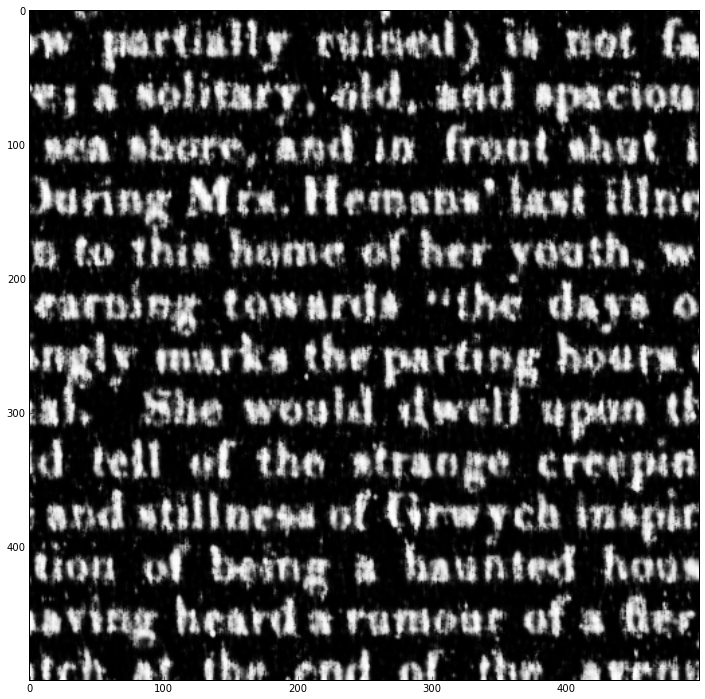

In [99]:
train(500,eta=5.0)
pred = forward(image)
imshow(pred)

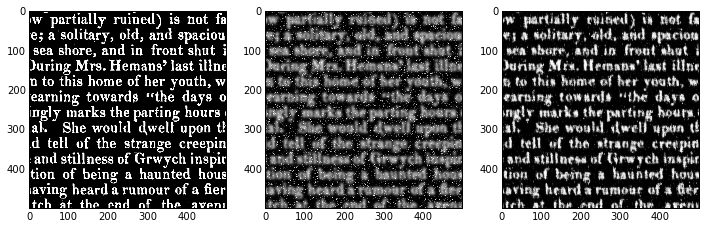

In [100]:
figsize(12,12)
subplot(131); imshow(target)
subplot(132); imshow(image)
subplot(133); imshow(pred)

(8, 500, 500)

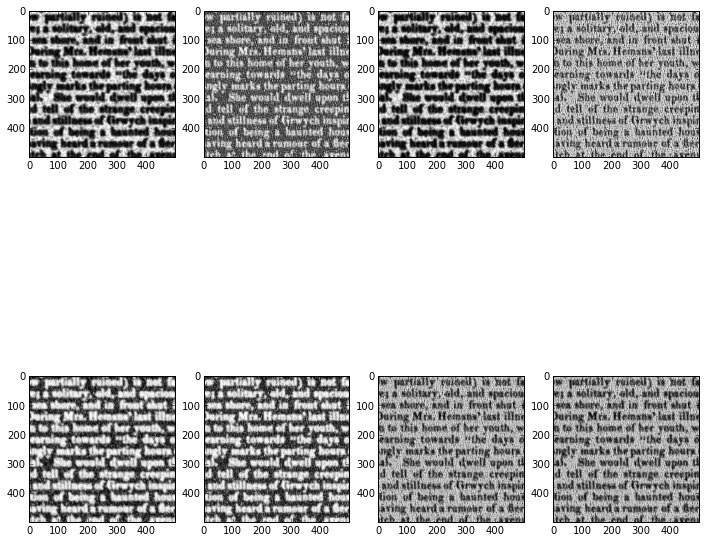

In [101]:
hs = array([sigmoid(filters.convolve(image,f)+thetas[i]) for i,f in enumerate(fs)])
for i in range(N):
    subplot(2,4,i+1); imshow(hs[i])
hs.shape

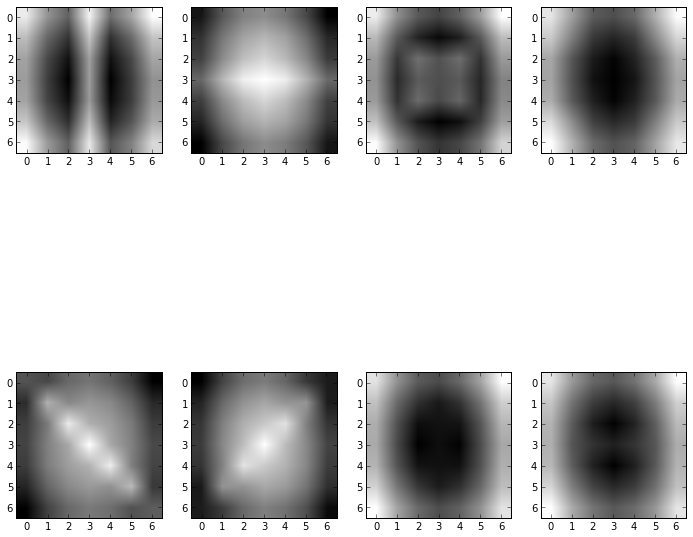

In [102]:
for i in range(N):
    subplot(2,4,i+1); imshow(fs[i])

In [103]:
print thetas
print ws
print theta2

[ 0.21134476 -0.84214145  0.47465556  1.15101984 -0.25504015 -0.62009864
  1.03987463  0.96926459]
[-1.0440527   2.4542143  -1.50268043 -3.5040394   1.29853975  1.94842908
 -2.61495456 -2.44724263]
-0.345268163126
